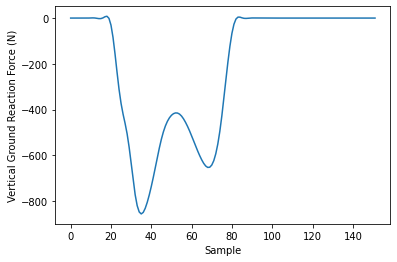

In [101]:
import h5py
import os
import json
import matplotlib.pyplot as plt

import sys
sys.path.append("./../")



if __name__ == '__main__':
    with h5py.File(os.path.join(DATA_PATH,'all_17_subjects.h5'), 'r') as hf:
        data_all_sub = {subject: subject_data[:] for subject, subject_data in hf.items()}
        data_fields = json.loads(hf.attrs['columns'])

    data_subject_01 = data_all_sub['subject_03']
    index_ = data_fields.index('plate_2_force_z')

    plt.figure()
    plt.plot(data_subject_01[:1, :, index_].ravel())
    ax = plt.gca()
    ax.set_xlabel('Sample')
    ax.set_ylabel('Vertical Ground Reaction Force (N)')
    plt.show()

In [109]:
for subject_id_name, data in data_all_sub.items():
    if(np.isnan(data).any()):
        print('nan in subject:', subject_id_name)
        print("NAN position:", np.argwhere(np.isnan(data)))

nan in subject: subject_02
NAN position: [[ 96 146   0]
 [ 96 146   1]
 [ 96 146   2]
 ...
 [ 97  47 237]
 [ 97  47 245]
 [ 97  47 254]]


In [9]:
from vicon_imu_data_process.process_walking_data import *
aa=interpret_data_fields()
print(len(aa))


256
R_FOOT_Gyro_Z


In [24]:
index = 5
print(data_fields[index])
print(aa[index])

EXT_KM_Z
R_KNEE_MOMENT_Z


2.1098812


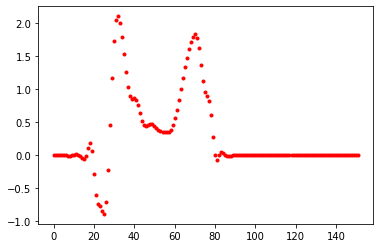

In [80]:

temp = data_all_sub['subject_03'][0,:,4]
print(max(temp))
    
plt.plot(temp,'r.')

In [ ]:
subjects_trials_data={}
for subject_id_name in data_all_sub.items():
    subjects_trials[subject_id_name]=[]

## Translate walking experiment data into drop landing data format

In [1]:
import re
import copy
import sys
import json
sys.path.append("./../")
from vicon_imu_data_process.const import DATA_PATH, SAMPLE_FREQUENCY
import pandas as pd
import numpy as np
from vicon_imu_data_process.process_landing_data import *
from vicon_imu_data_process.const import FEATURES_FIELDS, LABELS_FIELDS

## Save normalized dataset and its scaler

In [87]:


    #2) concate them into a numpy for scale
    list_subjects_trials_data = [subjects_trials_data[subject_id_name][trial].values for subject_id_name in subject_ids_names for trial in subjects_trials[subject_id_name]]
    #np_subjects_trials_data = np.concatenate(list_subjects_trials_data,axis=0)

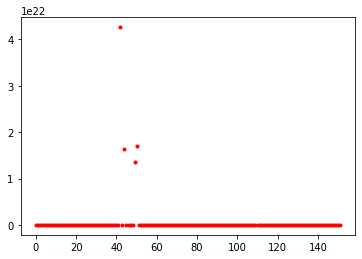

In [41]:
plt.plot(strange,'r.')

In [82]:
np.max(np_subjects_trials_data,axis=0)

array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan, 1.52])

In [ ]:
norm_subjects_trials_data = pro_rd.load_subjects_dataset(h5_file_name = hyperparams['raw_dataset_path'],selected_columns=hyperparams['columns_names'])
scaler = pro_rd.load_scaler('scaler_file')

In [51]:
reformat_subjects_trials_data = interpret_data_format()
save_subjects_dataset_to_a_h5(reformat_subjects_trials_data,"walking_data.hdf5")     



<function interpret_data_fields at 0x7f12ac2dd9d0>


### Visualization

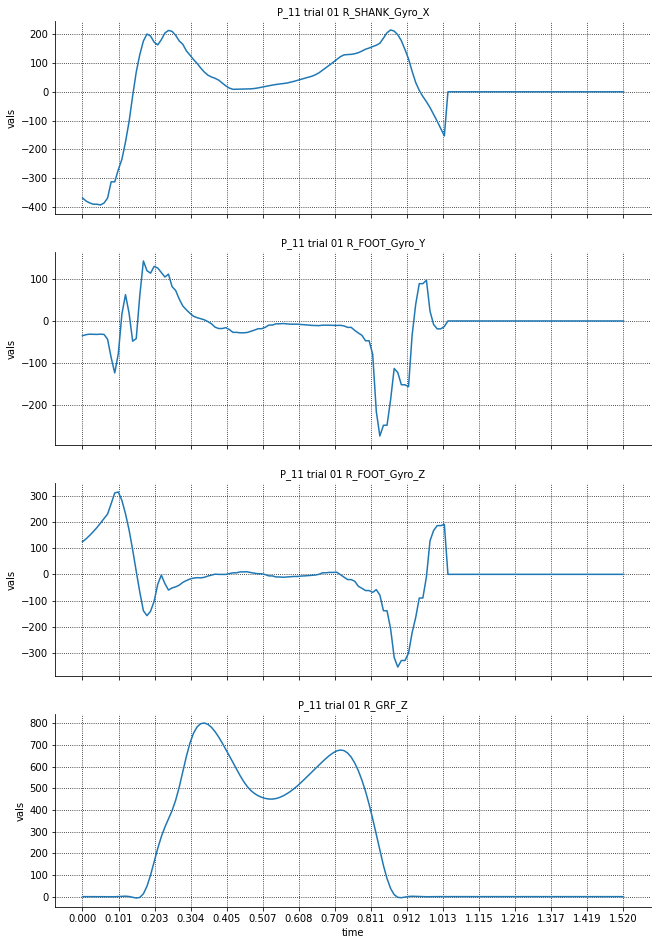

In [55]:

data = subjects_trials_data['subject_03']['71']
displayed_data = data[['R_SHANK_Gyro_X','R_FOOT_Gyro_Y','R_FOOT_Gyro_Z', 'R_GRF_Z']]
plot_rawdataset_curves(displayed_data,figheight=15,figtitle='P_11 trial 01',show=True,col_wrap=1)


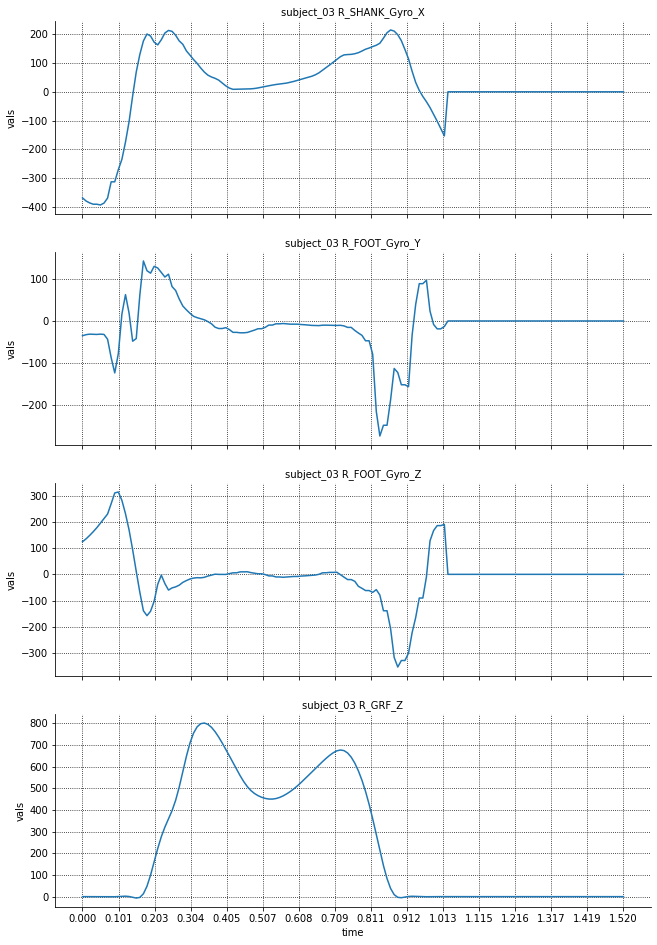

In [56]:
data = reformat_subjects_trials_data['subject_03']['71']
displayed_data = data[['R_SHANK_Gyro_X','R_FOOT_Gyro_Y','R_FOOT_Gyro_Z', 'R_GRF_Z']]
plot_rawdataset_curves(displayed_data,figheight=15,figtitle='subject_03',show=True,col_wrap=1)

## test model

In [ ]:
import re
import copy
import sys
import json
sys.path.append("./../")
from vicon_imu_data_process.const import DATA_PATH, SAMPLE_FREQUENCY
import pandas as pd
import numpy as np
from vicon_imu_data_process.process_landing_data import *
from estimation_study import *
from vicon_imu_data_process.const import FEATURES_FIELDS, LABELS_FIELDS
from estimation_assessment.scores import *

training_folder="/media/sun/DATA/drop_landing_workspace/results/training_testing/2022-08-19/training_012450/"
scaler = load_scaler('landing_scaler_file')
hyperparams = initParameters(labels_names=['R_GRF_Z'],features_names= ['TIME'] + const.extract_imu_fields(const.IMU_SENSOR_LIST,const.ACC_GYRO_FIELDS))

norm_subjects_trials_data = load_subjects_dataset(h5_file_name = os.path.join(DATA_PATH,'norm_walking_data.hdf5'), selected_columns = hyperparams['columns_names'])
test_data =  norm_subjects_trials_data['subject_03']['1'].values


tensorflow version: 2.5.0
tensorflow version: 2.5.0
[LogicalDevice(name='/device:CPU:0', device_type='CPU')] []


In [ ]:
test_model(training_folder,test_data, scaler)

In [14]:
scaler.__dict__

{'with_mean': True,
 'with_std': True,
 'copy': True,
 'n_features_in_': 129,
 'n_samples_seen_': 54320,
 'mean_': array([ 2.54454284e-02,  9.98691330e+00, -3.85052513e+00,  8.67830512e-03,
        -2.01688086e-03, -1.17190374e-02, -6.02755468e-01, -7.74461243e-01,
         1.03267000e-01,  2.63390801e-02,  9.83294316e+00, -3.10629160e+00,
        -6.34239128e-02,  6.42294681e-03, -1.47501089e-02, -5.27200240e-01,
        -5.91434745e-01,  6.82363392e-02, -3.79297942e+00,  9.60299704e+00,
        -7.35898761e-01,  3.24778177e-02,  6.42297735e-02,  2.35055386e-01,
         2.21364946e-01, -6.09786496e-01, -3.70399925e-01,  3.63514340e+00,
         8.72176992e+00, -1.35977128e+00, -5.15744567e-02, -7.14610757e-02,
        -2.48701116e-01, -6.87568427e-02, -5.89163894e-01, -4.40544894e-01,
        -3.65590852e-01,  6.30212487e+00,  5.57961019e+00, -3.82838606e-01,
        -1.16473183e-01, -9.17754138e-02, -4.15503686e-01, -1.44401228e-01,
        -6.62601667e-01,  3.53677034e+00,  9.44554